In [52]:
#just using the core-based MSA shapefiles for the entire States directly
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler
# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/cb_2018_us_cbsa_500k.shp')
gdf_CT = gpd.read_file('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/cb_2018_us_state_500k.shp')
gdf_CT_census = gpd.read_file('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/cb_2018_09_bg_500k.shp')
gdf_counties = gpd.read_file('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/cb_2018_us_county_500k.shp')
gdf_towns = gpd.read_file('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/Town_Polygon.shp')

gdf_counties
Tolland = gdf_counties[gdf_counties['NAME'] == 'Tolland']
Middlesex = gdf_counties[gdf_counties['NAME'] == 'Middlesex'][2:3]
Hartford = gdf_counties[gdf_counties['NAME'] == 'Hartford']
NewHaven = gdf_counties[gdf_counties['NAME'] == 'New Haven']
Fairfield= gdf_counties[gdf_counties['NAME'] == 'Fairfield'].iloc[0:1]
gdf_towns

,OBJECTID,TBPOLY_COD,TOWN_POLY,AV_LEGEND,IMS_LEGEND,COASTP_COD,COAST_POLY,STATE_COD,FIPS_COD,TOWN_NO,TOWN,CNTY_COD,COUNTY,ACREAGE,AREA_SQMI,SHAPE_Leng,SHAPE_Area,geometry
0,1,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,122,Salisbury,5,Litchfield,38514.300781,60.178600,0.596666,1.693281e-02,"POLYGON ((-73.48739 42.04956, -73.48280 42.049..."
1,2,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,100,North Canaan,5,Litchfield,12495.099609,19.523500,0.330442,5.496483e-03,"POLYGON ((-73.29629 42.04700, -73.28804 42.046..."
2,3,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,98,Norfolk,5,Litchfield,29663.300781,46.348900,0.469949,1.304085e-02,"POLYGON ((-73.17214 42.04340, -73.16961 42.043..."
3,4,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,29,Colebrook,5,Litchfield,21046.599609,32.885399,0.401726,9.255303e-03,"POLYGON ((-73.05308 42.03979, -73.05240 42.039..."
4,5,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,65,Hartland,3,Hartford,21935.199219,34.273800,0.430597,9.646552e-03,"POLYGON ((-72.97902 42.03826, -72.97767 42.038..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,781,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,2.502160,0.003910,0.005064,1.083612e-06,"POLYGON ((-73.63445 40.99528, -73.63476 40.995..."
781,782,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,35.702000,0.055784,0.023188,1.546062e-05,"POLYGON ((-73.63743 40.99258, -73.63756 40.992..."
782,783,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,0.666138,0.001041,0.002090,2.884606e-07,"POLYGON ((-73.60855 40.99066, -73.60847 40.990..."
783,784,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,4.012030,0.006269,0.006438,1.737306e-06,"POLYGON ((-73.61188 40.98802, -73.61197 40.988..."


In [43]:
#get the shapefile only related to connecticut

# Replace 'path/to/your/shapefile.shp' with the actual path to your shapefile
shapefile_path = 'C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/cb_2018_us_county_500k.shp'

# Read the shapefile into a GeoDataFrame
gdf_all_counties = gpd.read_file(shapefile_path)

# Assuming there is a column named 'STATE' that contains the state codes
# Replace 'CT' with the state code for Connecticut in your data
STATEFP_connecticut = '09'

# Filter rows for Connecticut
gdf_connecticut_counties = gdf_all_counties[gdf_all_counties['STATEFP'] == STATEFP_connecticut]

#output_path = 'path/to/save/connecticut_counties.shp'
#gdf_connecticut_counties.to_file(output_path)

gdf_connecticut_counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
56,09,009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
659,09,001,00212794,0500000US09001,09001,Fairfield,06,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ..."
660,09,007,00212797,0500000US09007,09007,Middlesex,06,956493754,180679140,"POLYGON ((-72.75294 41.59250, -72.74284 41.594..."
661,09,011,00212799,0500000US09011,09011,New London,06,1722716728,276657755,"POLYGON ((-72.46673 41.58390, -72.42886 41.588..."
1238,09,005,00212796,0500000US09005,09005,Litchfield,06,2384116952,62334525,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."
1239,09,013,00212668,0500000US09013,09013,Tolland,06,1062807467,17549693,"POLYGON ((-72.51733 41.86990, -72.51692 41.873..."
1991,09,015,00212801,0500000US09015,09015,Windham,06,1328478475,21477921,"POLYGON ((-72.25208 41.72706, -72.25264 41.728..."
2003,09,003,00212338,0500000US09003,09003,Hartford,06,1903543897,40543777,"POLYGON ((-73.02054 42.00009, -73.00876 42.038..."


In [44]:
rows_to_drop = [661, 1238,1991]
gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
target_counties = gdf_connecticut_counties
target_counties['POPULATION'] = [898636,956446,164568,150120,898636]
target_counties

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17492\4057742416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,POPULATION
56,09,009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",898636
659,09,001,00212794,0500000US09001,09001,Fairfield,06,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...",956446
660,09,007,00212797,0500000US09007,09007,Middlesex,06,956493754,180679140,"POLYGON ((-72.75294 41.59250, -72.74284 41.594...",164568
1239,09,013,00212668,0500000US09013,09013,Tolland,06,1062807467,17549693,"POLYGON ((-72.51733 41.86990, -72.51692 41.873...",150120
2003,09,003,00212338,0500000US09003,09003,Hartford,06,1903543897,40543777,"POLYGON ((-73.02054 42.00009, -73.00876 42.038...",898636


In [46]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]
result

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
271,278,25540,310M400US25540,25540,"Hartford-West Hartford-East Hartford, CT",M1,3922845118,238772610,"POLYGON ((-73.02054 42.00009, -73.00876 42.038..."
315,148,49340,310M400US49340,49340,"Worcester, MA-CT",M1,5241042553,198926981,"POLYGON ((-72.31363 42.39640, -72.31509 42.398..."
342,278,35980,310M400US35980,35980,"Norwich-New London, CT",M1,1722716728,276657755,"POLYGON ((-72.46673 41.58390, -72.42886 41.588..."
781,408,35300,310M400US35300,35300,"New Haven-Milford, CT",M1,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
939,408,14860,310M400US14860,14860,"Bridgeport-Stamford-Norwalk, CT",M1,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ..."
943,408,45860,310M400US45860,45860,"Torrington, CT",M2,2384116952,62334525,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."


In [47]:
#extract a single row out as the dataframe
HEM = result.iloc[0:1]
NHM = result.iloc[3:4]
BSN = result.iloc[4:5]

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17492\2317989534.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_towns.geometry.centroid.x, gdf_towns.geometry.centroid.y, gdf_towns['TOWN']):


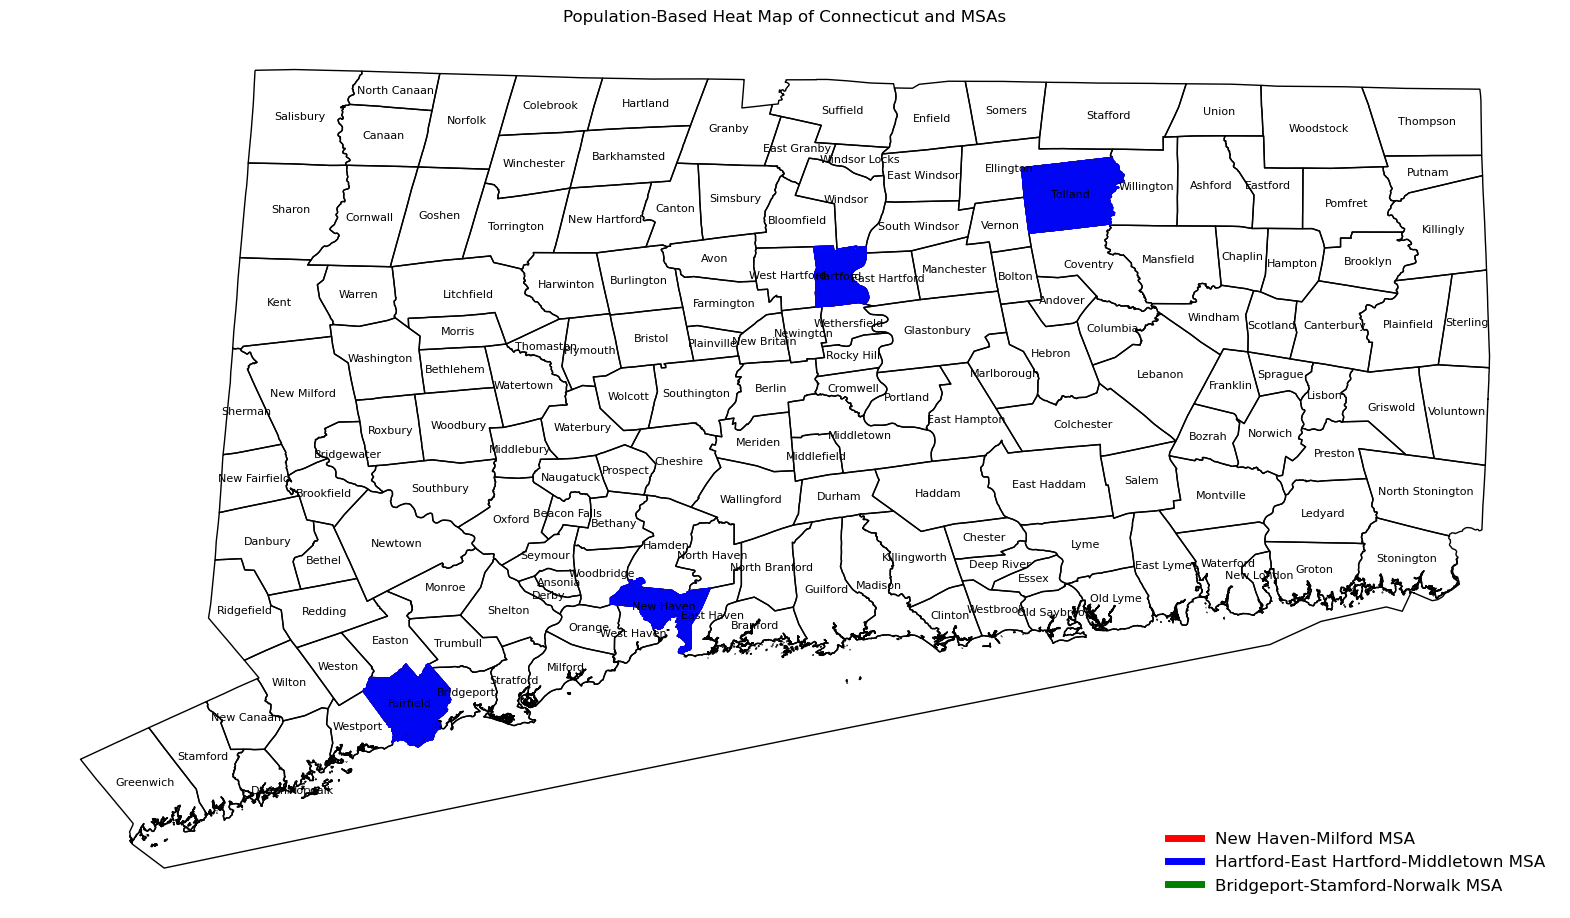

In [53]:
# Create a new figure and axis for the map
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_axis_off()

# Plot Connecticut counties
gdf_towns.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot each county with a color representing its population
for idx, county_row in target_counties.iterrows():
    county_name = county_row['NAME']
    county_population = county_row['POPULATION']
    color = 'blue' if county_name in ['Tolland', 'Middlesex', 'Hartford'] else 'red' if county_name == 'New Haven' else 'green'
    
    # Filter the GeoDataFrame to get the specific county geometry
    county_geometry = gdf_towns[gdf_towns['TOWN'].isin(target_counties['NAME'])].unary_union
    
    # Plot the county boundary
    gpd.GeoSeries(county_geometry).boundary.plot(ax=ax, linewidth=1, color=color)
    
    # Plot the county with population-based alpha
    gpd.GeoSeries(county_geometry).plot(ax=ax, facecolor=color, alpha=county_population / target_counties['POPULATION'].max())

# Plot town labels
unique_town_names = set()
texts = []

for x, y, label in zip(gdf_towns.geometry.centroid.x, gdf_towns.geometry.centroid.y, gdf_towns['TOWN']):
    if label not in unique_town_names:
        texts.append(plt.text(x, y, label, fontsize=8, ha='center', va='center', color='black'))
        unique_town_names.add(label)

ax.set_aspect('equal')
ax.set_title('Population-Based Heat Map of Connecticut and MSAs')

# Create custom legend handles with matching colors for the legend
legend_handles = [
    Line2D([0], [0], color='red', lw=5, label='New Haven-Milford MSA'),
    Line2D([0], [0], color='blue', lw=5, label='Hartford-East Hartford-Middletown MSA'),
    Line2D([0], [0], color='green', lw=5, label='Bridgeport-Stamford-Norwalk MSA'),
]

# Add a custom legend to the map with a transparent background
legend = ax.legend(handles=legend_handles, fontsize=12, loc='lower right', frameon=False)

# Show the map
plt.show()


KeyError: 'New Haven'

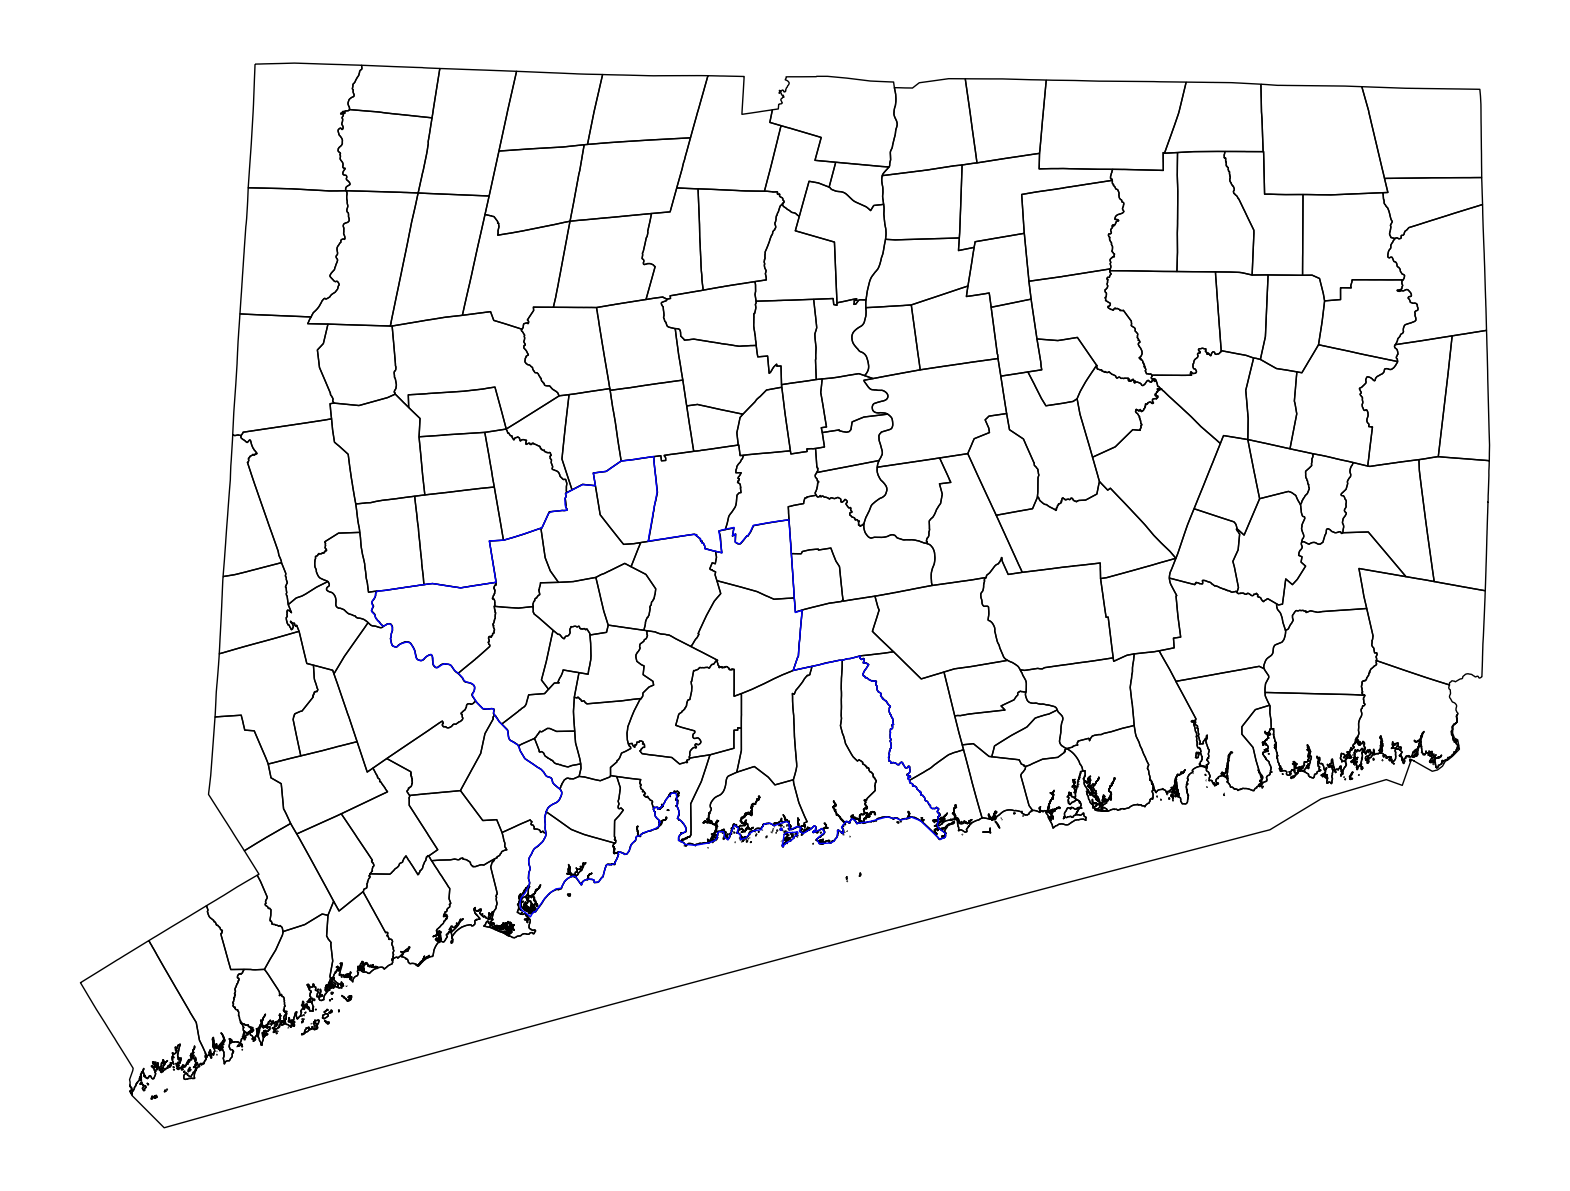

In [39]:
# Create a new figure and axis for the map, the population of Connecticut is obtained from: https://www.connecticut-demographics.com/counties_by_population
fig, ax = plt.subplots(figsize=(20, 20))

ax.set_axis_off()

populations = {'NewHaven': 864751, 'Fairfield': 956446, 'Middlesex': 164568,'Tolland': 150120,'Hartford': 898636}


# Plot Connecticut counties
gdf_towns.boundary.plot(ax=ax, linewidth=1, color='black')

for county, color in zip([NewHaven,Fairfield, Middlesex, Tolland, Hartford], ['blue', 'blue', 'blue', 'blue', 'blue']):
    county.boundary.plot(ax=ax, linewidth=1, color=color)
    county.plot(ax=ax, facecolor=color, alpha=populations[target_counties['NAME'].iloc[0]] / max(populations.values()))



#Tolland.boundary.plot(ax=ax, linewidth=1, color='blue')
#Middlesex.boundary.plot(ax=ax, linewidth=1, color='blue')
#Hartford.boundary.plot(ax=ax, linewidth=1, color='blue')
#NewHaven.boundary.plot(ax=ax, linewidth=1, color='red')
#Fairfield.boundary.plot(ax=ax, linewidth=1, color='green')



In [ ]:
# Plot the New Haven-Milford MSA and fill it with red
NHM.boundary.plot(ax=ax, linewidth=1, color='black')
NHM.plot(ax=ax, facecolor='red', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with blue
HEM.boundary.plot(ax=ax, linewidth=1, color='black')
HEM.plot(ax=ax, facecolor='blue', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with green
BSN.boundary.plot(ax=ax, linewidth=1, color='black')
BSN.plot(ax=ax, facecolor='green', alpha=0.5)

unique_town_names = set()
texts = []

for x, y, label in zip(gdf_towns.geometry.centroid.x, gdf_towns.geometry.centroid.y, gdf_towns['TOWN']):
    if label not in unique_town_names:
        texts.append(plt.text(x, y, label, fontsize=8, ha='center', va='center', color='black'))
        unique_town_names.add(label)

ax.set_aspect('equal')
#ax.set_title('Connecticut and MSAs Map')

# Create custom legend handles with matching colors for the legend
legend_handles = [
    Line2D([0], [0], color='red', lw=5, label='New Haven-Milford MSA'),
    Line2D([0], [0], color='blue', lw=5, label='Hartford-East Hartford-Middletown MSA'),
    Line2D([0], [0], color='green', lw=5, label='Bridgeport-Stamford-Norwalk MSA'),
]

# Add a custom legend to the map with transparent background
legend = ax.legend(handles=legend_handles, fontsize=12, loc='lower right', frameon=False)
# Show the map
#plt.show()

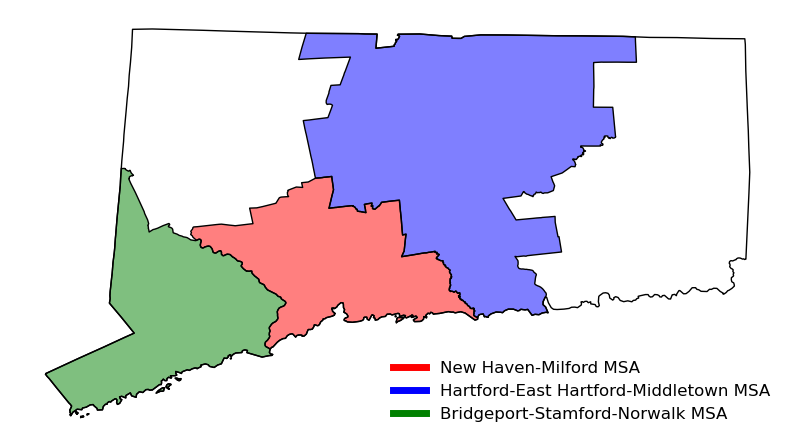

In [5]:
# Create a new figure and axis for the map 
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_axis_off()

# Plot Connecticut counties
CT_result.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the New Haven-Milford MSA and fill it with red
NHM.boundary.plot(ax=ax, linewidth=1, color='black')
NHM.plot(ax=ax, facecolor='red', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with blue
HEM.boundary.plot(ax=ax, linewidth=1, color='black')
HEM.plot(ax=ax, facecolor='blue', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with green
BSN.boundary.plot(ax=ax, linewidth=1, color='black')
BSN.plot(ax=ax, facecolor='green', alpha=0.5)

ax.set_aspect('equal')
#ax.set_title('Connecticut and MSAs Map')

# Create custom legend handles with matching colors for the legend
legend_handles = [
    Line2D([0], [0], color='red', lw=5, label='New Haven-Milford MSA'),
    Line2D([0], [0], color='blue', lw=5, label='Hartford-East Hartford-Middletown MSA'),
    Line2D([0], [0], color='green', lw=5, label='Bridgeport-Stamford-Norwalk MSA'),
]

# Add a custom legend to the map with transparent background
legend = ax.legend(handles=legend_handles, fontsize=12, loc='lower right', frameon=False)
# Show the map
#plt.show()


In [6]:
#outline some of the cities/town in the entire map

gdf_town = gpd.read_file('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/Town_Polygon.shp')
Harford_gdf = gdf_town[gdf_town['TOWN'] == 'Hartford']
Newhaven_gdf = gdf_town[gdf_town['TOWN'] == 'New Haven']
Waterbury_gdf = gdf_town[gdf_town['TOWN'] == 'Waterbury']
Bridgeport_gdf = gdf_town[gdf_town['TOWN'] == 'Bridgeport']
Danbury_gdf = gdf_town[gdf_town['TOWN'] == 'Danbury']

In [7]:
longitude1, latitude1 = Harford_gdf.centroid.x.values[0], Harford_gdf.centroid.y.values[0]
longitude2, latitude2 = Newhaven_gdf.centroid.x.values[0], Newhaven_gdf.centroid.y.values[0]
longitude3, latitude3 = Waterbury_gdf.centroid.x.values[0], Waterbury_gdf.centroid.y.values[0]
longitude4, latitude4 = Bridgeport_gdf.centroid.x.values[0], Bridgeport_gdf.centroid.y.values[0]
longitude5, latitude5 = Danbury_gdf.centroid.x.values[0], Danbury_gdf.centroid.y.values[0]

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17492\4074120522.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude1, latitude1 = Harford_gdf.centroid.x.values[0], Harford_gdf.centroid.y.values[0]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17492\4074120522.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude2, latitude2 = Newhaven_gdf.centroid.x.values[0], Newhaven_gdf.centroid.y.values[0]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17492\4074120522.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude3, latitude3 = Waterbury_gdf.c

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# Load town shapefile
gdf_towns = gpd.read_file('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/Town_Polygon.shp')

# Load population data from a separate file
#population_data = pd.read_csv('path/to/population_data.csv')

# Aggregate population data for towns with the same name
#population_data_aggregated = population_data.groupby('Town_Name')['Population'].sum().reset_index()

# Merge town shapefile with aggregated population data based on town name
#merged_data = gdf_towns.merge(population_data_aggregated, how='left', left_on='Town_Name', right_on='Town_Name')

# ... (Your existing code)

# Plot Connecticut counties
gdf_towns.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the New Haven-Milford MSA and fill it with red
NHM.boundary.plot(ax=ax, linewidth=1, color='black')
NHM.plot(ax=ax, facecolor='red', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with blue
HEM.boundary.plot(ax=ax, linewidth=1, color='black')
HEM.plot(ax=ax, facecolor='blue', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with green
BSN.boundary.plot(ax=ax, linewidth=1, color='black')
BSN.plot(ax=ax, facecolor='green', alpha=0.5)

# Plot town boundaries with population-based heat map
merged_data.plot(ax=ax, column='Population', cmap='viridis', legend=True, legend_kwds={'label': "Population by Town"})

# Plot town names without repetition
unique_town_names = set()
texts = []

for x, y, label in zip(gdf_towns.geometry.centroid.x, gdf_towns.geometry.centroid.y, gdf_towns['Town_Name']):
    if label not in unique_town_names:
        texts.append(plt.text(x, y, label, fontsize=8, ha='center', va='center', color='black'))
        unique_town_names.add(label)

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# ... (Your existing code)


NameError: name 'merged_data' is not defined

<Figure size 640x480 with 0 Axes>